### Using python to visualize DEMs (Digital Elevation Models)

In [38]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Let's convert a tif DEM to npy (numpy) array

1. load dem "caparrapi.tif" from data folder
2. convert raster to npy array

In [3]:
# search data directory and then select tif
raster = imageio.imread("data/caparrapi.tif") 
np.save("data/caparrapi.npy", raster)

In [4]:
caparrapi = np.load("data/caparrapi.npy")
caparrapi.shape

(1201, 1201)

 Definition of font size, line width and the EW section coordinate and the NS coordinate direction to be plottedm

In [5]:
fontsize = 14
linewidth = 3
ew_section1 = 600
ns_section1 = 700

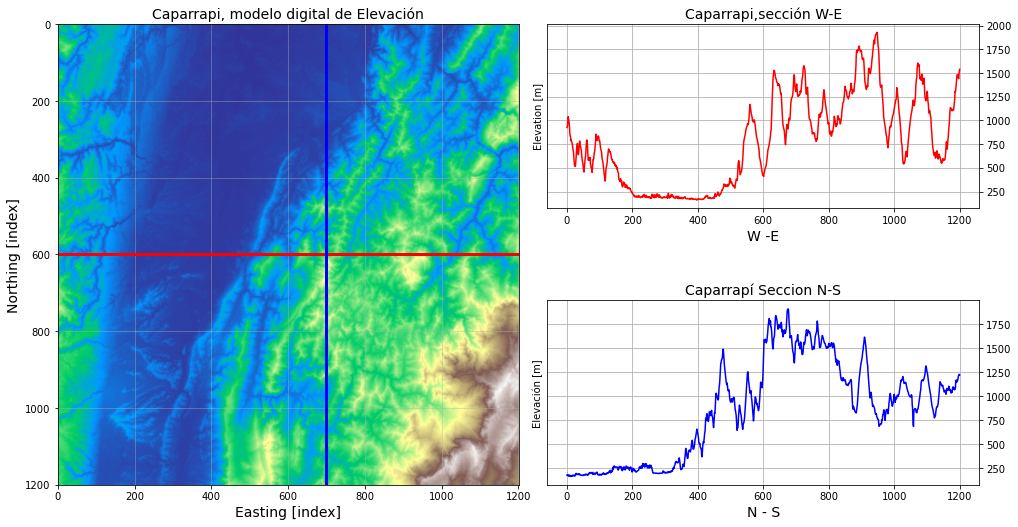

In [6]:
fig = plt.figure(figsize = (12,8))

# Plot of original DEM
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_title('Caparrapi, modelo digital de Elevación', fontsize=fontsize)
ax.imshow(caparrapi, cmap="terrain")
ax.axhline(ew_section1, color='red', lw=linewidth)
ax.axvline(ns_section1, color='blue', lw=linewidth)
ax.set_ylabel('Northing [index]', size=fontsize)
ax.set_xlabel('Easting [index]', size=fontsize)
ax.grid(alpha=0.5)

# Plot of Section W-E
ax2 = fig.add_axes([0.8,0.58,0.5,0.32])
ax2.set_title('Caparrapi,sección W-E', fontsize=fontsize)
ax2.plot(caparrapi[ew_section1], c='red')
ax2.set_xlabel('W -E', size=fontsize)
ax2.set_ylabel('Elevation [m]')
ax2.yaxis.tick_right()
ax2.grid()

# Plot of Section N-S 
ax3 = fig.add_axes([0.8,0.1,0.5,0.32])
ax3.set_title('Caparrapí Seccion N-S', fontsize=fontsize)
ax3.plot(caparrapi[:,ns_section1], c='blue')
ax3.set_xlabel('N - S', size=fontsize)
ax3.set_ylabel('Elevación [m]')
ax3.yaxis.tick_right()

ax3.grid()

plt.show()

### 3D visualization of DEM

In [21]:
caparrapi

array([[1116, 1140, 1142, ...,  681,  660,  663],
       [1101, 1118, 1145, ...,  652,  637,  650],
       [1072, 1097, 1129, ...,  674,  646,  636],
       ...,
       [1314, 1322, 1292, ..., 2573, 2573, 2563],
       [1344, 1324, 1277, ..., 2616, 2571, 2565],
       [1367, 1327, 1274, ..., 2622, 2592, 2569]], dtype=int16)

In [23]:
caparrapi.shape

(1201, 1201)

#### Converting data to X, Y, Z in a pandas dataframe

In [50]:
# get shape of numpy array
rows, cols = caparrapi.shape
# create a grid with this shape
X, Y = np.mgrid[:rows, :cols]
# ravel the values as 3 columns
npgrid = np.column_stack((Y.ravel(), X.ravel(), caparrapi.ravel()))


In [41]:
print("X, Y, Z")
npgrid


X, Y, Z


array([[   0,    0, 1116],
       [   1,    0, 1140],
       [   2,    0, 1142],
       ...,
       [1198, 1200, 2622],
       [1199, 1200, 2592],
       [1200, 1200, 2569]])

In [42]:
npgrid.shape

(1442401, 3)

Converting to pandas dataframe [:, 0] means get all values in column 0

In [44]:

grid = pd.DataFrame({'X': npgrid[:, 0], 'Y': npgrid[:, 1], 'Z': npgrid[:, 2]})

In [45]:
grid.head()

,X,Y,Z
0,0,0,1116
1,1,0,1140
2,2,0,1142
3,3,0,1165
4,4,0,1186


#### 3D scatter of values in DEM


Text(0.5, 0, 'Elev')

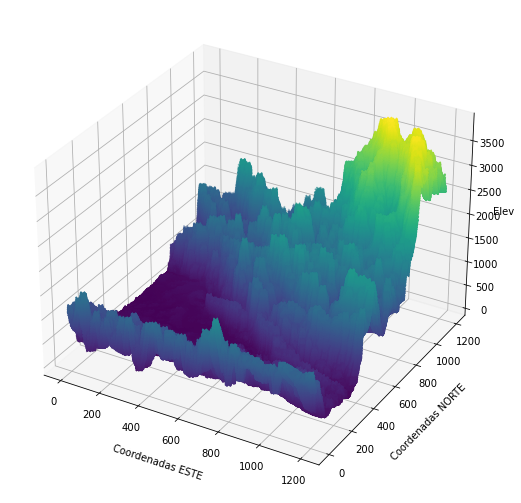

In [49]:
fig= plt.figure(figsize=(12,9))


ax = fig.add_subplot(111, projection='3d')

ax.scatter(grid['Y'],grid['X'],grid['Z'], c=grid['Z'], marker='x')

plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)
plt.locator_params(axis='z', nbins=10)

ax.set_xlabel('Coordenadas ESTE', labelpad=10)
ax.set_ylabel('Coordenadas NORTE', labelpad=10)
ax.set_zlabel('Elev', labelpad=0)

### Interactive example using a DEM


In [ ]:
from ipywidgets import interact

@interact(DP=(0,4,0.1))
def make_dem_cross_sections(ew_section1, ns_section1 ):
    fig = plt.figure(figsize = (12,8))

    # Plot of original DEM
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    ax.set_title('Caparrapi, modelo digital de Elevación', fontsize=fontsize)
    ax.imshow(caparrapi, cmap="terrain")
    ax.axhline(ew_section1, color='red', lw=linewidth)
    ax.axvline(ns_section1, color='blue', lw=linewidth)
    ax.set_ylabel('Northing [index]', size=fontsize)
    ax.set_xlabel('Easting [index]', size=fontsize)
    ax.grid(alpha=0.5)

    # Plot of Section W-E
    ax2 = fig.add_axes([0.8,0.58,0.5,0.32])
    ax2.set_title('Caparrapi,sección W-E', fontsize=fontsize)
    ax2.plot(caparrapi[ew_section1], c='red')
    ax2.set_xlabel('W -E', size=fontsize)
    ax2.set_ylabel('Elevation [m]')
    ax2.yaxis.tick_right()
    ax2.grid()

    # Plot of Section N-S 
    ax3 = fig.add_axes([0.8,0.1,0.5,0.32])
    ax3.set_title('Caparrapí Seccion N-S', fontsize=fontsize)
    ax3.plot(caparrapi[:,ns_section1], c='blue')
    ax3.set_xlabel('N - S', size=fontsize)
    ax3.set_ylabel('Elevación [m]')
    ax3.yaxis.tick_right()

    ax3.grid()

    plt.show()